In [0]:
import socket
import json
from sklearn.externals import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import os
import pandas as pd
from time import sleep

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
cwd = os.getcwd()
df = pd.read_csv(cwd+'/occupancy/censortest.csv', index_col=False)
df = df.drop(['Number','date'], axis=1)

In [0]:
X_test = df.loc[:, df.columns != 'Occupancy']
y_test = df['Occupancy']

In [0]:
lr = joblib.load('lr.pkl')
dt = joblib.load('dt.pkl')
knn = joblib.load('knn.pkl')
lda = joblib.load('lda.pkl')
gnb = joblib.load('gnb.pkl')
svm = joblib.load('svm.pkl')
rf = joblib.load('rf.pkl')
ensemble = joblib.load('ensemble.pkl')

In [0]:
models = {'Logistic Regression': lr,
              'Decision Trees': dt,
             # 'K-NN': knn,
              'LDA': lda,
              'GNB': gnb,
              'SVM': svm,
              'Random Forest': rf,
              'Ensemble': ensemble}

In [0]:
fpr_l = []
tpr_l = []
thresholds_l = []
roc_auc_l = []
acc_l = []
pre_l = []
rec_l =[]
def model_test(key, model):
    y_pred = model.predict(X_test)
    print ("********************************", key," Model prediction ***************************")
    print("Confusions matrix:", metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    acc_l.append(metrics.accuracy_score(y_test, y_pred))
    pre_l.append(metrics.precision_score(y_test, y_pred))
    rec_l.append(metrics.recall_score(y_test, y_pred))
    y_prob = model.predict_proba(X_test)
    #print(y_prob)
    y_prob = y_prob[:,1]
    print("Area under the curve AUC:", metrics.roc_auc_score(y_test, y_prob))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)
    fpr_l.append(fpr)
    tpr_l.append(tpr)
    thresholds_l.append(thresholds)
    roc_auc_l.append(roc_auc)
#     plt.plot([0,1],[0,1], linestyle='--')
#     plt.plot(fpr, tpr, marker='.')
#     plt.show()

In [0]:
for key, value in models.items():
    model_test(key, value)

******************************** Logistic Regression  Model prediction ***************************
Confusions matrix: [[1638   55]
 [   3  969]]
Accuracy: 0.9782363977485928
Precision: 0.9462890625
Recall: 0.9969135802469136
Area under the curve AUC: 0.9919591442857177
0.9919591442857177
******************************** Decision Trees  Model prediction ***************************
Confusions matrix: [[1635   58]
 [ 152  820]]
Accuracy: 0.9212007504690432
Precision: 0.9339407744874715
Recall: 0.8436213991769548
Area under the curve AUC: 0.9046813434160025
0.9046813434160025
******************************** LDA  Model prediction ***************************
Confusions matrix: [[1638   55]
 [   1  971]]
Accuracy: 0.9789868667917448
Precision: 0.9463937621832359
Recall: 0.9989711934156379
Area under the curve AUC: 0.9921900636608256
0.9921900636608256
******************************** GNB  Model prediction ***************************
Confusions matrix: [[1638   55]
 [   5  967]]
Accuracy: 0.9

C:\Users\Natasha\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


******************************** Ensemble  Model prediction ***************************
Confusions matrix: [[1637   56]
 [   6  966]]
Accuracy: 0.9767354596622889
Precision: 0.9452054794520548
Recall: 0.9938271604938271
Area under the curve AUC: 0.9891170129241929
0.9891170129241929


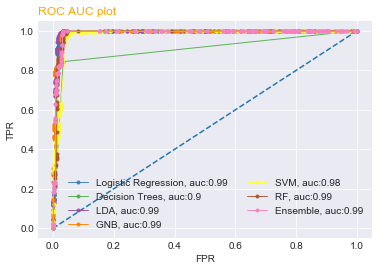

In [0]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
num=0
model_names = ['Logistic Regression','Decision Trees', 'LDA', 'GNB','SVM','RF','Ensemble']
plt.plot([0,1],[0,1], linestyle='--')
for i in range(7):
    num+=1
    plt.plot(fpr_l[i], tpr_l[i], marker='.', color=palette(num), linewidth=1, alpha=0.9, label=model_names[i]+', auc:'+str(round(roc_auc_l[i],2)))
plt.legend(loc=0, ncol=2)
plt.title("ROC AUC plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

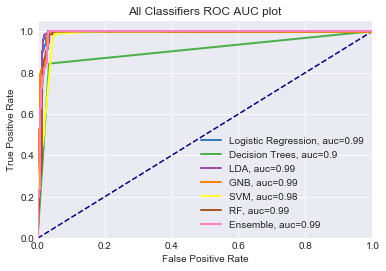

In [0]:
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
palette = plt.get_cmap('Set1')
num=0
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('All Classifiers ROC AUC plot')
for i in range(7):
    num+=1
    plt.plot(fpr_l[i], tpr_l[i], color=palette(num), lw=2, label=model_names[i]+", auc="+str(round(roc_auc_l[i],2)))
plt.legend(loc="lower right")
plt.show()

In [0]:
model_stats = pd.DataFrame(index=model_names)

In [0]:
model_stats['Accuracy'] = acc_l
model_stats['Precision'] = pre_l
model_stats['Recall'] = rec_l
model_stats['AUC'] = roc_auc_l

In [0]:
model_stats

,Accuracy,Precision,Recall,AUC
Logistic Regression,0.978236,0.946289,0.996914,0.991959
Decision Trees,0.921201,0.933941,0.843621,0.904681
LDA,0.978987,0.946394,0.998971,0.992190
GNB,0.977486,0.946184,0.994856,0.989499
SVM,0.910319,0.804655,0.995885,0.979375
RF,0.936585,0.965238,0.856996,0.986231
Ensemble,0.976735,0.945205,0.993827,0.989117
